<a href="https://colab.research.google.com/github/Pradyumna-yes/Dublin-Fire-Incident-Time-Series-Forecasting/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

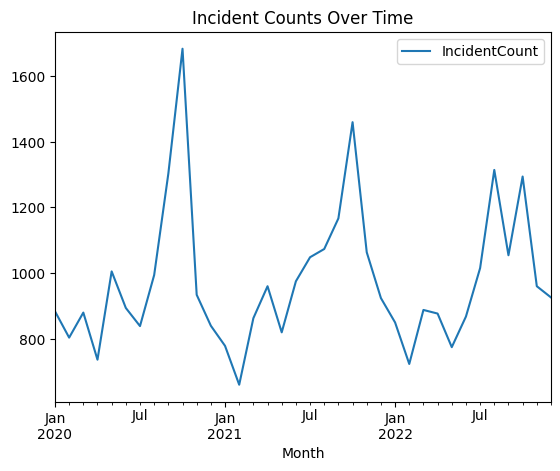

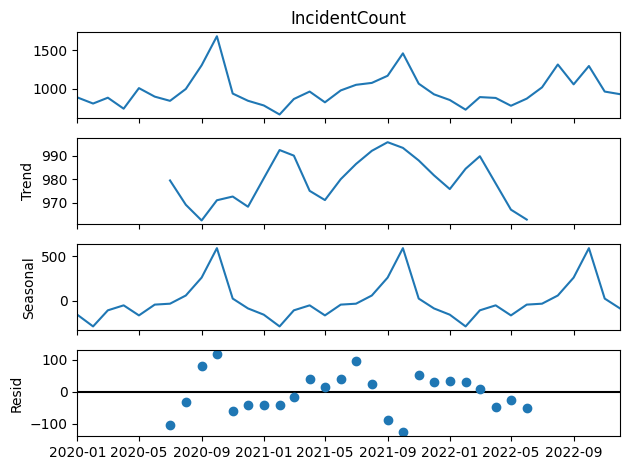

ADF Statistic: -5.464554
p-value: 0.000002


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          IncidentCount   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -234.791
Date:                Wed, 31 Jan 2024   AIC                            475.581
Time:                        19:03:26   BIC                            480.247
Sample:                    01-01-2020   HQIC                           477.192
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4813      0.157      3.064      0.002       0.173       0.789
ma.L1         -0.9986      8.309     -0.120      0.904     -17.284      15.287
sigma2      3.647e+04   2.98e+05      0.122      0.9

In [31]:
import pandas as pd

df = pd.read_csv('/content/Time Series Forecasting.csv')

df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df['IncidentCount'] = pd.to_numeric(df['IncidentCount'])

import matplotlib.pyplot as plt

df.plot()
plt.title('Incident Counts Over Time')
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['IncidentCount'], model='additive')
decomposition.plot()
plt.show()

from statsmodels.tsa.stattools import adfuller

result = adfuller(df['IncidentCount'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model (adjust the order as needed for your data)
model = ARIMA(df['IncidentCount'], order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())



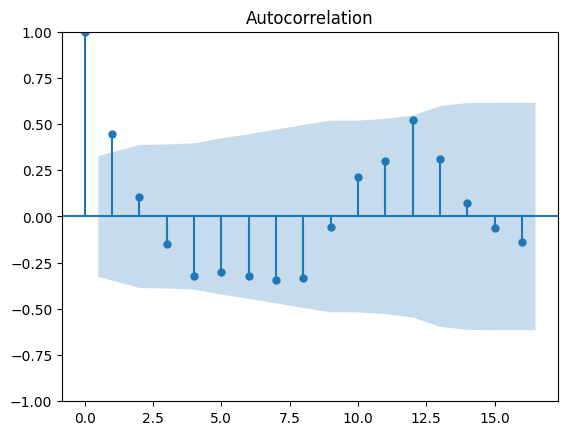

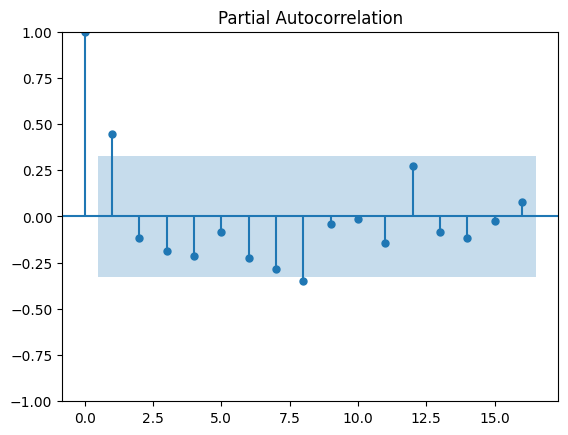

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


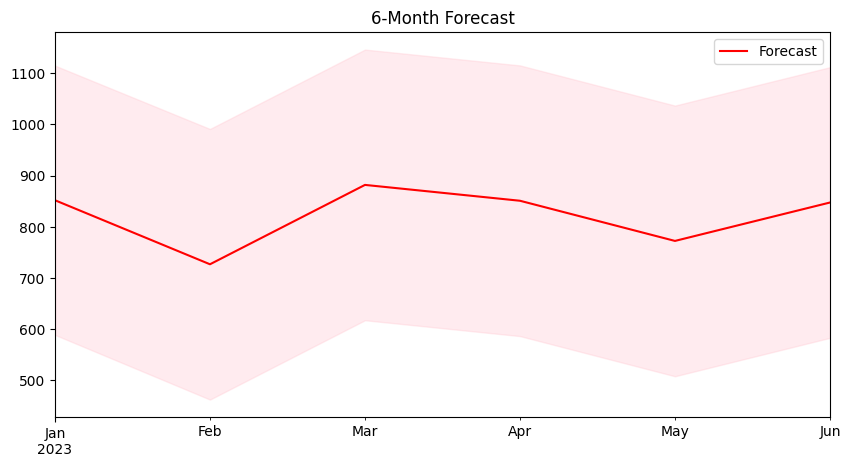

In [30]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/Time Series Forecasting.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df['IncidentCount'] = pd.to_numeric(df['IncidentCount'])

# Plot ACF and PACF to help determine model parameters
plot_acf(df['IncidentCount'])
plot_pacf(df['IncidentCount'])
plt.show()

# Fit a SARIMA model (this is just an example, you'll need to find the best parameters)
model = SARIMAX(df['IncidentCount'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Forecasting the future
forecast = model_fit.get_forecast(steps=6)
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(10, 5))
forecast.predicted_mean.plot(label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('6-Month Forecast')
plt.legend()
plt.show()
